C:\Users\Matheus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Matheus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Matheus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Gordura Corporal: 30
Gasto Caloria: 150

Peso 102.15


C:\Users\Matheus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Matheus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


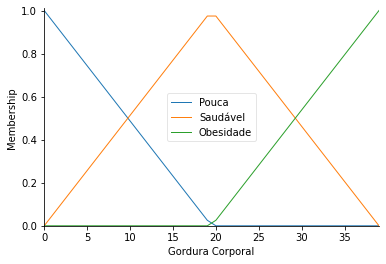

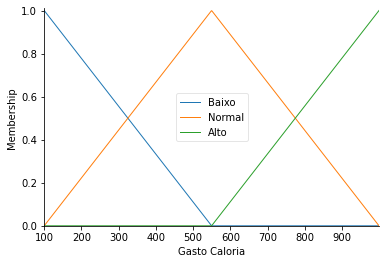

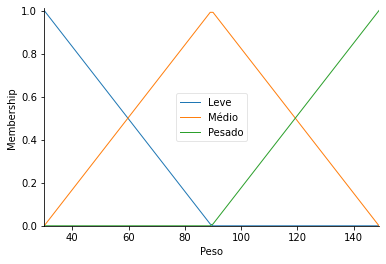

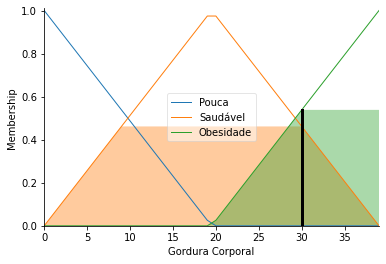

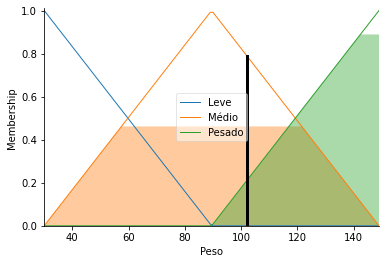

In [12]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#Variaveis de Entrada (Antecedent)
gorduraCorporal = ctrl.Antecedent(np.arange(0, 40, 1), 'Gordura Corporal')
gastoCaloria = ctrl.Antecedent(np.arange(100, 1000, 1), 'Gasto Caloria')

#Variaveis de saída (Consequent)
Peso = ctrl.Consequent(np.arange(30, 150, 1), 'Peso')

# automf -> Atribuição de categorias automaticamente
gorduraCorporal.automf(names=['Pouca','Saudável','Obesidade'],)
gastoCaloria.automf(names=['Baixo','Normal','Alto'])
Peso.automf(names=['Leve','Médio','Pesado'])

#Visualizando as variáveis
gorduraCorporal.view()
gastoCaloria.view()
Peso.view()

#Criando as regras
regra_1 = ctrl.Rule(gorduraCorporal['Pouca'] & gastoCaloria['Alto'], Peso['Leve'])
regra_2 = ctrl.Rule(gorduraCorporal['Saudável'] | gastoCaloria['Normal'], Peso['Médio'])
regra_3 = ctrl.Rule(gorduraCorporal['Obesidade'] | gastoCaloria['Baixo'], Peso['Pesado'])

controlador = ctrl.ControlSystem([regra_1, regra_2, regra_3])

#Simulando
calcularPeso = ctrl.ControlSystemSimulation(controlador)

calcularPeso.input['Gordura Corporal'] = int(input('Gordura Corporal: '))
calcularPeso.input['Gasto Caloria'] = int(input('Gasto Caloria: '))
calcularPeso.compute()

valorPeso = calcularPeso.output['Peso']

print("\nPeso %5.2f" %(valorPeso))

gorduraCorporal.view(sim=calcularPeso)
Peso.view(sim=calcularPeso)

plt.show()